In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from astropy import units as u
from astropy.coordinates import SkyCoord
import healpy as hp
from astropy.io.votable import parse_single_table
import matplotlib.cm as cm

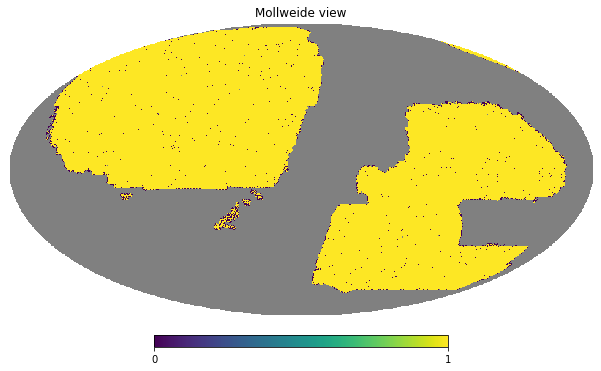

In [8]:
# Read both data sets and the full coverage mask

wholesouthdata = pd.read_csv('../../bricks_data/uncleaned_systematics_south.csv')


northdata = pd.read_csv('../../bricks_data/uncleaned_systematics_north.csv')


fullmask = hp.read_map("../../bricks_data/masks/mask_512.fits")
fullmask = fullmask[hp.ring2nest(512, np.arange(hp.nside2npix(512)))]
hp.mollview(fullmask, rot=110)


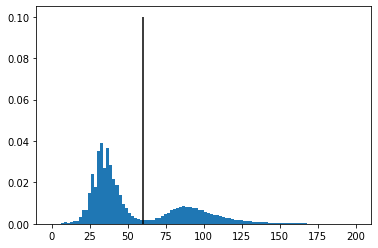

In [9]:
# for the south we can split DES & DECALS based on number of exposures

plt.hist(wholesouthdata['exposures'], range=[0, 200], bins=100, density=True);
plt.vlines(60, 0, .1, color='k')

# create arrays holding coordinates of healpix pixels
# both longitude-latitude and galactic coordinates, in order to make further cuts.
lon, lat = hp.pix2ang(512, np.arange(hp.nside2npix(512)), lonlat=True, nest=False)
theta, phi = hp.pix2ang(512, np.arange(hp.nside2npix(512)), lonlat=False, nest=False)
rot = hp.Rotator(coord=['E', 'G'])
l, b = rot(theta, phi)

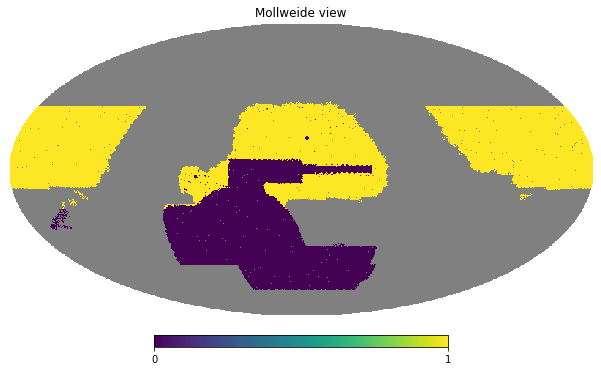

In [10]:
# main cuts for south
southipixmask = np.logical_or(
        wholesouthdata['exposures'] < 60, 
        l[wholesouthdata['pixel_id']] < np.pi/2
)
southipixmask &= lat[wholesouthdata['pixel_id']] > -20

# apply coverage mask, just in case.
southipixmask &= fullmask[wholesouthdata['pixel_id']]

hpmap = np.zeros(hp.nside2npix(512)) + hp.UNSEEN
hpmap[wholesouthdata['pixel_id'][southipixmask]] = 1
hpmap[wholesouthdata['pixel_id'][~southipixmask]] = 0

hp.mollview(hpmap)

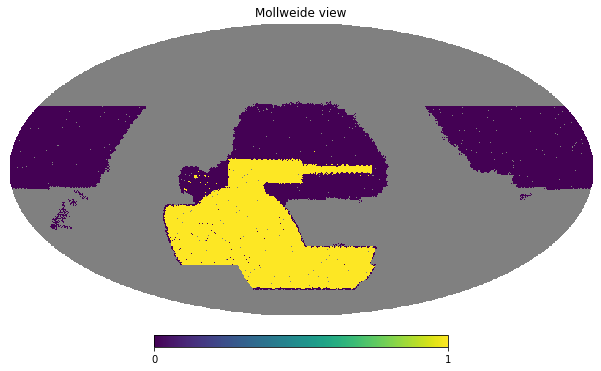

In [11]:
# main cuts for DES
desipixmask = wholesouthdata['exposures'] > 60
desipixmask &= lat[wholesouthdata['pixel_id']] < 10
desipixmask &= l[wholesouthdata['pixel_id']] > np.pi/2

# apply coverage mask, just in case.
hpmap = np.zeros(hp.nside2npix(512)) + hp.UNSEEN
hpmap[wholesouthdata['pixel_id'][desipixmask]] = 1
hpmap[wholesouthdata['pixel_id'][~desipixmask]] = 0

hp.mollview(hpmap)

In [12]:
# Now create arrays holding the three data sets

print(len(northdata))
desdata = wholesouthdata[desipixmask]
southdata = wholesouthdata[southipixmask]
northdata = northdata[fullmask[northdata['pixel_id']] > 0]
print(len(northdata))


378636
378636


In [23]:
# Select one of them! for running the rest of the code below
# (a hacky way to make a choice...)

data = northdata

/Users/edgareggert/miniconda3/envs/astro/lib/python3.8/site-packages/healpy/visufunc.py:200: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f = pylab.figure(fig, figsize=(8.5, 5.4))


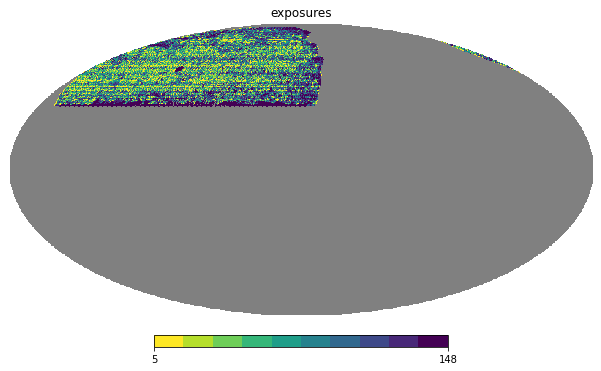

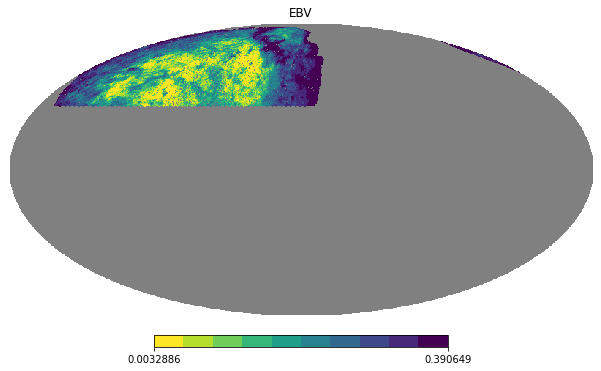

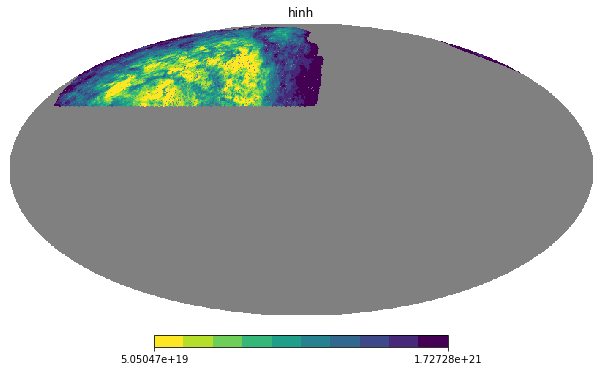

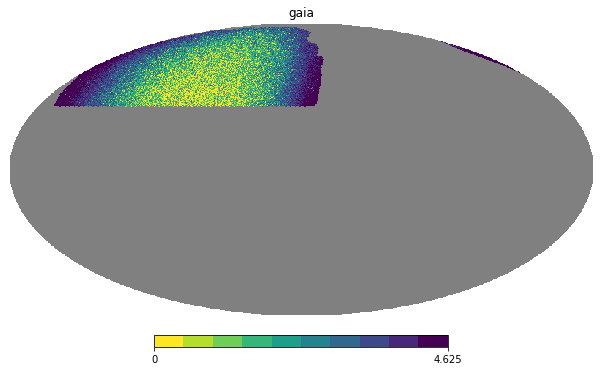

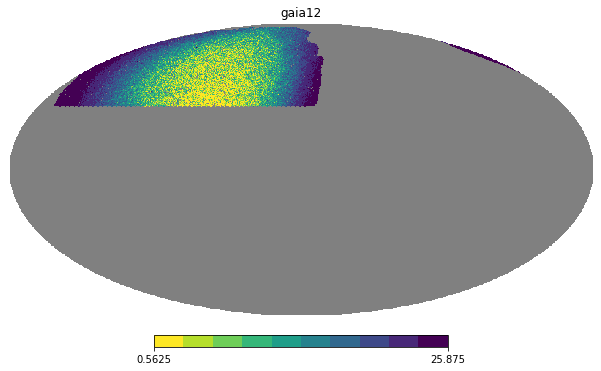

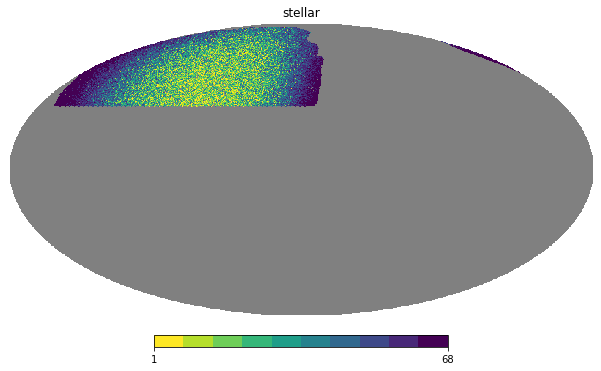

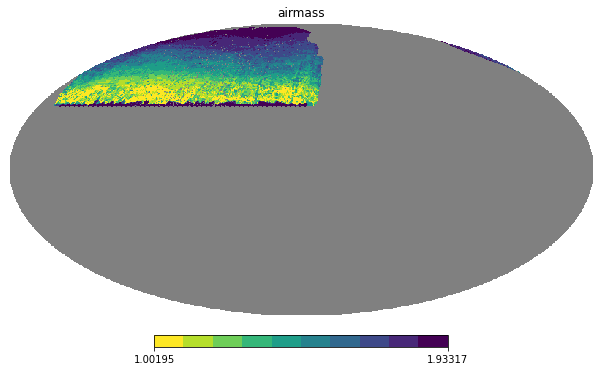

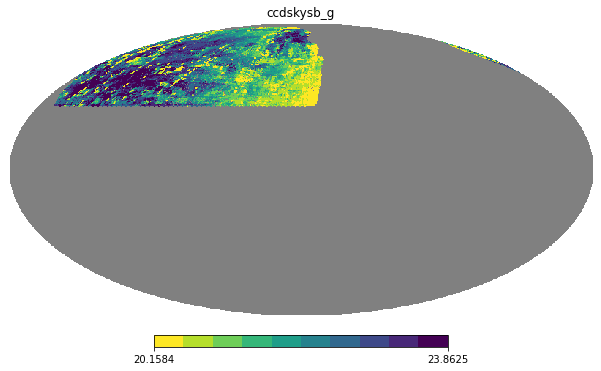

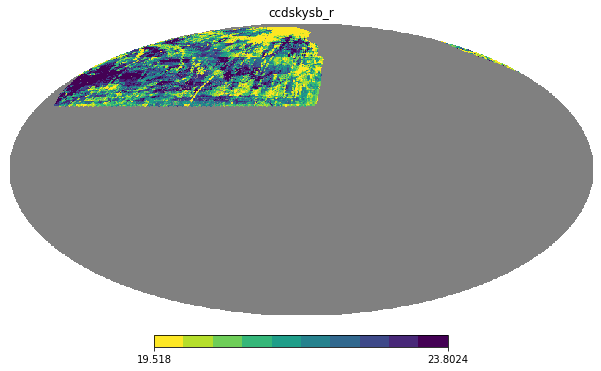

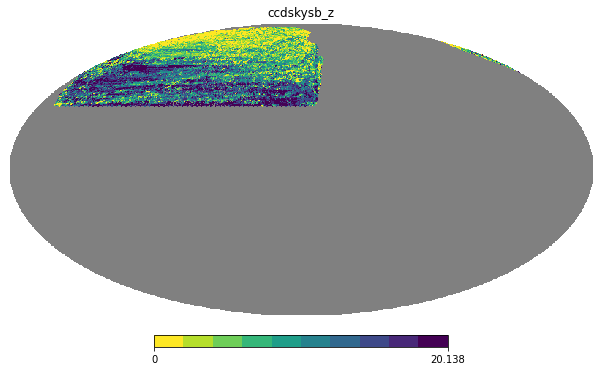

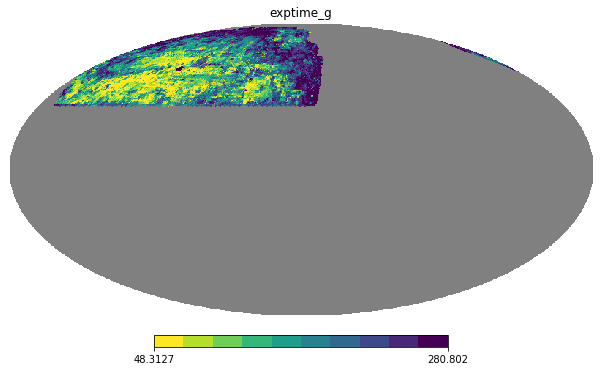

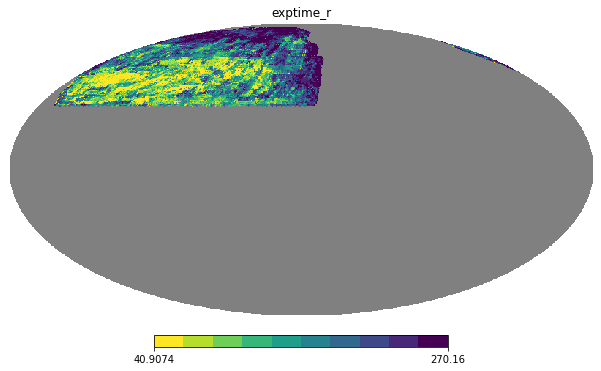

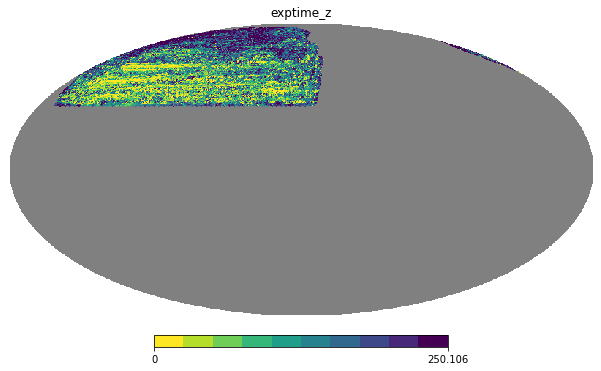

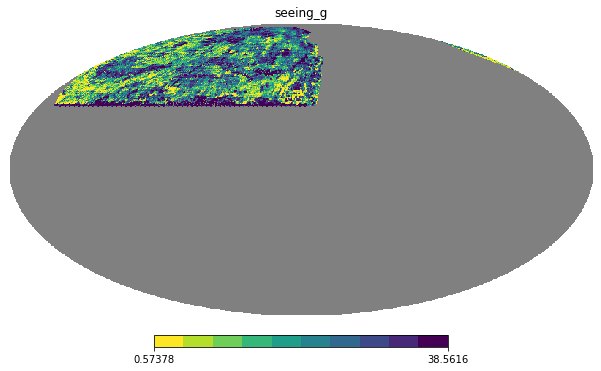

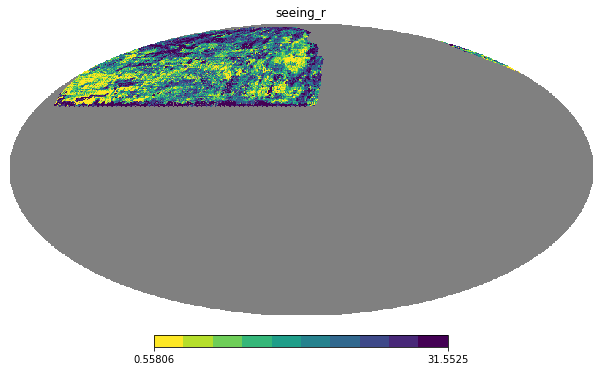

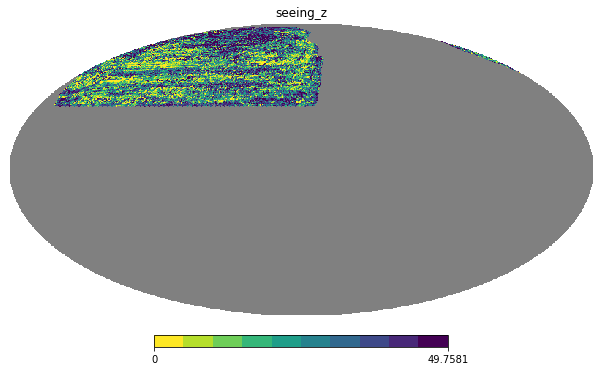

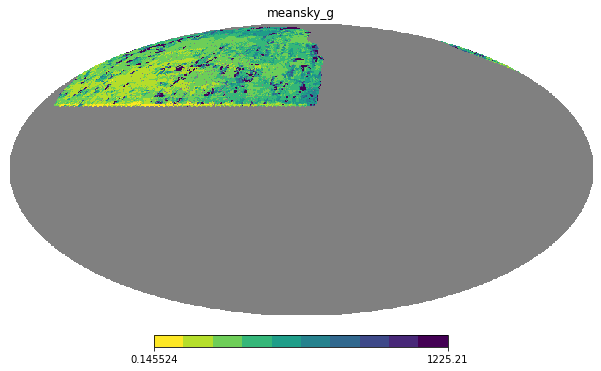

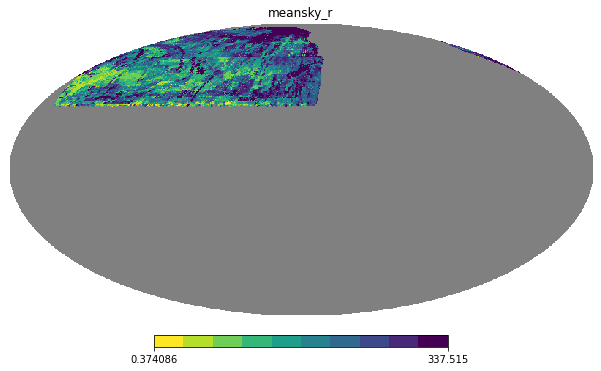

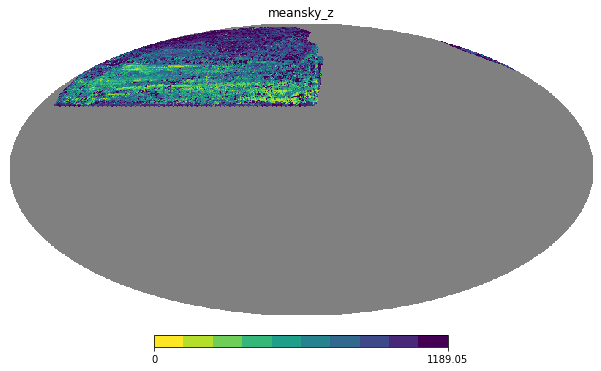

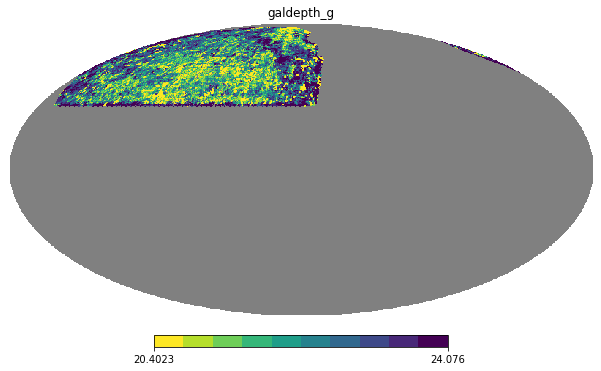

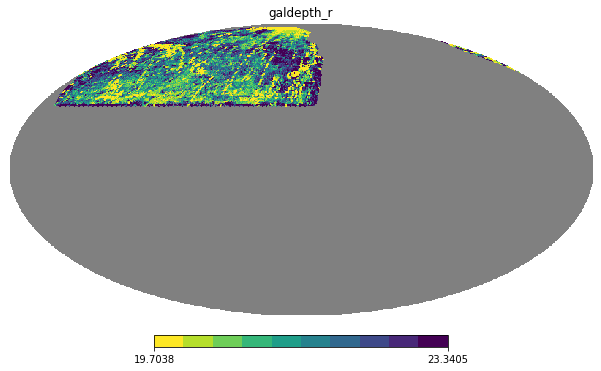

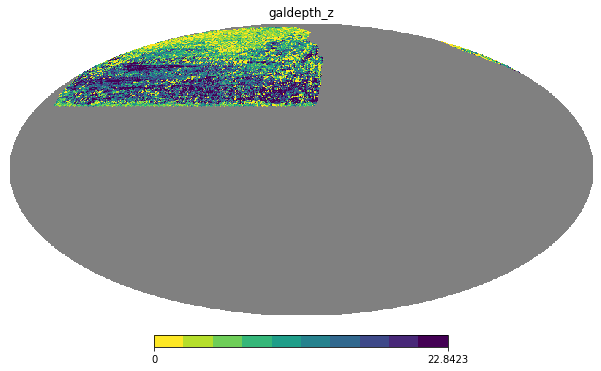

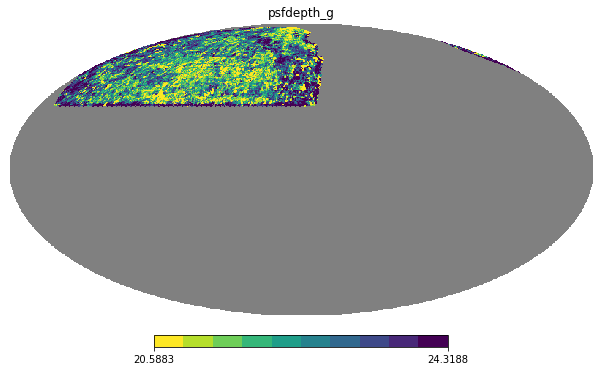

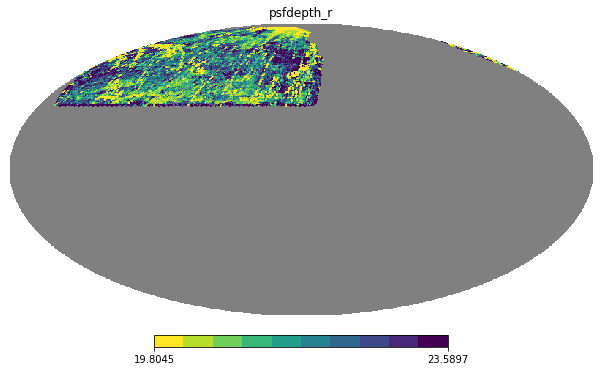

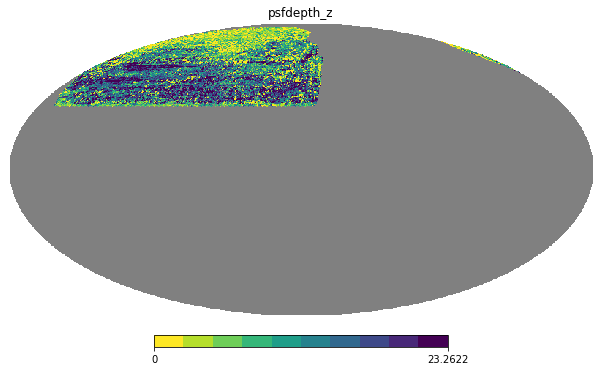

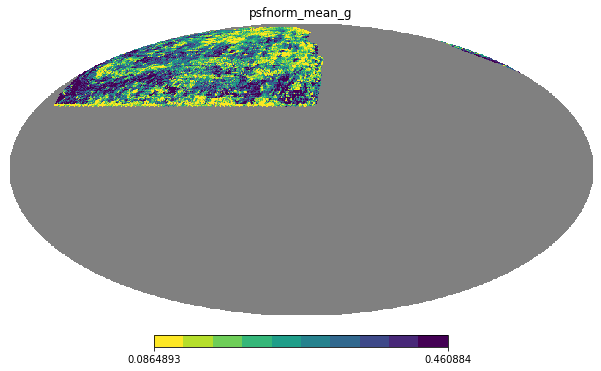

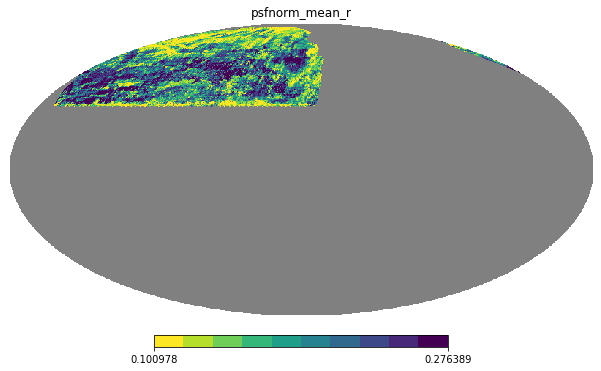

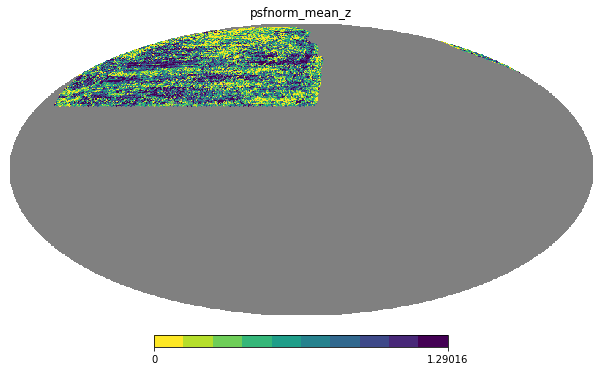

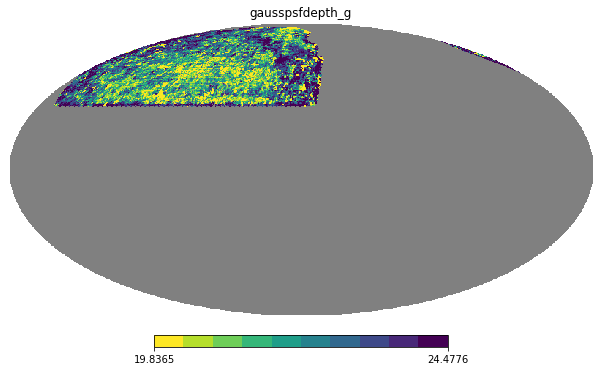

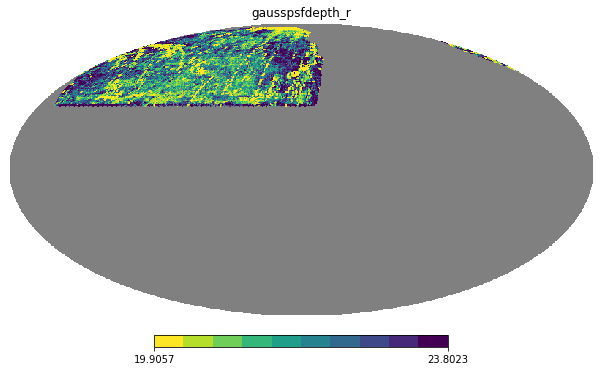

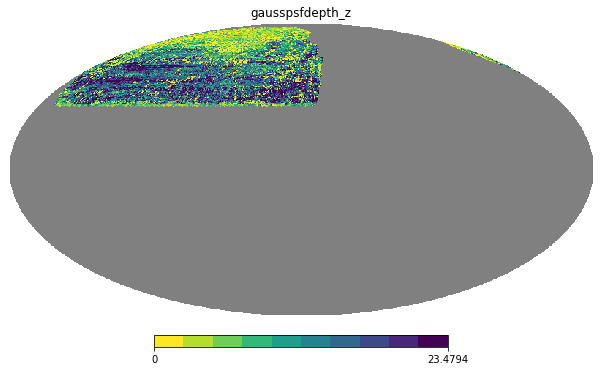

In [24]:
# simply plot all maps

names = [
       'exposures', 
       'EBV', 
       'hinh', 'gaia', 'gaia12', 'stellar', 'airmass',
       'ccdskysb_g', 'ccdskysb_r', 'ccdskysb_z', 
       'exptime_g', 'exptime_r', 'exptime_z', 
       'seeing_g', 'seeing_r', 'seeing_z',
       'meansky_g', 'meansky_r', 'meansky_z', 
       'galdepth_g', 'galdepth_r', 'galdepth_z',
       'psfdepth_g', 'psfdepth_r', 'psfdepth_z',
       'psfnorm_mean_g','psfnorm_mean_r', 'psfnorm_mean_z', 
       'gausspsfdepth_g', 'gausspsfdepth_r', 'gausspsfdepth_z'
]

for i, nm in enumerate(names):
    hpmap = np.zeros(hp.nside2npix(512)) + hp.UNSEEN
    hpmap[data['pixel_id']] = data[nm]
    hp.mollview(hpmap, hold=False, cmap=cm.get_cmap('viridis_r', 10), norm='hist', rot=110, title=nm)

In [25]:
# which ones to make mask cuts on?

names = [
       #'exposures', 
       'EBV', 
       'hinh', 'gaia', 'gaia12', 'stellar', 'airmass',
       'ccdskysb_g', 'ccdskysb_r', 'ccdskysb_z', 
       'exptime_g', 'exptime_r', 'exptime_z', 
       'seeing_g', 'seeing_r', 'seeing_z',
       'meansky_g', 'meansky_r', 'meansky_z', 
       #'galdepth_g', 'galdepth_r', 'galdepth_z',
       #'psfdepth_g', 'psfdepth_r', 'psfdepth_z',
       #'psfnorm_mean_g','psfnorm_mean_r', 'psfnorm_mean_z', 
       #'gausspsfdepth_g', 'gausspsfdepth_r', 'gausspsfdepth_z'
]

In [26]:
# number of standard deviations away from mean
x = 10

<ipython-input-27-5c1e47d37f5f>:10: DeprecationWarning: `median_absolute_deviation` is deprecated, use `median_abs_deviation` instead!

To preserve the existing default behavior, use
`scipy.stats.median_abs_deviation(..., scale=1/1.4826)`.
The value 1.4826 is not numerically precise for scaling
with a normal distribution. For a numerically precise value, use
`scipy.stats.median_abs_deviation(..., scale='normal')`.

  themean, thestd = np.median(data[nm][ind]), mad(data[nm][ind])
<ipython-input-27-5c1e47d37f5f>:10: DeprecationWarning: `median_absolute_deviation` is deprecated, use `median_abs_deviation` instead!

To preserve the existing default behavior, use
`scipy.stats.median_abs_deviation(..., scale=1/1.4826)`.
The value 1.4826 is not numerically precise for scaling
with a normal distribution. For a numerically precise value, use
`scipy.stats.median_abs_deviation(..., scale='normal')`.

  themean, thestd = np.median(data[nm][ind]), mad(data[nm][ind])


Systematic EBV 862
Systematic hinh 279


<ipython-input-27-5c1e47d37f5f>:10: DeprecationWarning: `median_absolute_deviation` is deprecated, use `median_abs_deviation` instead!

To preserve the existing default behavior, use
`scipy.stats.median_abs_deviation(..., scale=1/1.4826)`.
The value 1.4826 is not numerically precise for scaling
with a normal distribution. For a numerically precise value, use
`scipy.stats.median_abs_deviation(..., scale='normal')`.

  themean, thestd = np.median(data[nm][ind]), mad(data[nm][ind])
<ipython-input-27-5c1e47d37f5f>:10: DeprecationWarning: `median_absolute_deviation` is deprecated, use `median_abs_deviation` instead!

To preserve the existing default behavior, use
`scipy.stats.median_abs_deviation(..., scale=1/1.4826)`.
The value 1.4826 is not numerically precise for scaling
with a normal distribution. For a numerically precise value, use
`scipy.stats.median_abs_deviation(..., scale='normal')`.

  themean, thestd = np.median(data[nm][ind]), mad(data[nm][ind])
<ipython-input-27-5c1e47d37f5f>:

Systematic gaia 60
Systematic gaia12 2276
Systematic stellar 752


<ipython-input-27-5c1e47d37f5f>:10: DeprecationWarning: `median_absolute_deviation` is deprecated, use `median_abs_deviation` instead!

To preserve the existing default behavior, use
`scipy.stats.median_abs_deviation(..., scale=1/1.4826)`.
The value 1.4826 is not numerically precise for scaling
with a normal distribution. For a numerically precise value, use
`scipy.stats.median_abs_deviation(..., scale='normal')`.

  themean, thestd = np.median(data[nm][ind]), mad(data[nm][ind])
<ipython-input-27-5c1e47d37f5f>:10: DeprecationWarning: `median_absolute_deviation` is deprecated, use `median_abs_deviation` instead!

To preserve the existing default behavior, use
`scipy.stats.median_abs_deviation(..., scale=1/1.4826)`.
The value 1.4826 is not numerically precise for scaling
with a normal distribution. For a numerically precise value, use
`scipy.stats.median_abs_deviation(..., scale='normal')`.

  themean, thestd = np.median(data[nm][ind]), mad(data[nm][ind])
<ipython-input-27-5c1e47d37f5f>:

Systematic airmass 0
Systematic ccdskysb_g 650
Systematic ccdskysb_r 13


<ipython-input-27-5c1e47d37f5f>:10: DeprecationWarning: `median_absolute_deviation` is deprecated, use `median_abs_deviation` instead!

To preserve the existing default behavior, use
`scipy.stats.median_abs_deviation(..., scale=1/1.4826)`.
The value 1.4826 is not numerically precise for scaling
with a normal distribution. For a numerically precise value, use
`scipy.stats.median_abs_deviation(..., scale='normal')`.

  themean, thestd = np.median(data[nm][ind]), mad(data[nm][ind])
<ipython-input-27-5c1e47d37f5f>:10: DeprecationWarning: `median_absolute_deviation` is deprecated, use `median_abs_deviation` instead!

To preserve the existing default behavior, use
`scipy.stats.median_abs_deviation(..., scale=1/1.4826)`.
The value 1.4826 is not numerically precise for scaling
with a normal distribution. For a numerically precise value, use
`scipy.stats.median_abs_deviation(..., scale='normal')`.

  themean, thestd = np.median(data[nm][ind]), mad(data[nm][ind])
<ipython-input-27-5c1e47d37f5f>:

Systematic ccdskysb_z 3
Systematic exptime_g 0
Systematic exptime_r 0


<ipython-input-27-5c1e47d37f5f>:10: DeprecationWarning: `median_absolute_deviation` is deprecated, use `median_abs_deviation` instead!

To preserve the existing default behavior, use
`scipy.stats.median_abs_deviation(..., scale=1/1.4826)`.
The value 1.4826 is not numerically precise for scaling
with a normal distribution. For a numerically precise value, use
`scipy.stats.median_abs_deviation(..., scale='normal')`.

  themean, thestd = np.median(data[nm][ind]), mad(data[nm][ind])
<ipython-input-27-5c1e47d37f5f>:10: DeprecationWarning: `median_absolute_deviation` is deprecated, use `median_abs_deviation` instead!

To preserve the existing default behavior, use
`scipy.stats.median_abs_deviation(..., scale=1/1.4826)`.
The value 1.4826 is not numerically precise for scaling
with a normal distribution. For a numerically precise value, use
`scipy.stats.median_abs_deviation(..., scale='normal')`.

  themean, thestd = np.median(data[nm][ind]), mad(data[nm][ind])
<ipython-input-27-5c1e47d37f5f>:

Systematic exptime_z 0
Systematic seeing_g 467
Systematic seeing_r 431


<ipython-input-27-5c1e47d37f5f>:10: DeprecationWarning: `median_absolute_deviation` is deprecated, use `median_abs_deviation` instead!

To preserve the existing default behavior, use
`scipy.stats.median_abs_deviation(..., scale=1/1.4826)`.
The value 1.4826 is not numerically precise for scaling
with a normal distribution. For a numerically precise value, use
`scipy.stats.median_abs_deviation(..., scale='normal')`.

  themean, thestd = np.median(data[nm][ind]), mad(data[nm][ind])
<ipython-input-27-5c1e47d37f5f>:10: DeprecationWarning: `median_absolute_deviation` is deprecated, use `median_abs_deviation` instead!

To preserve the existing default behavior, use
`scipy.stats.median_abs_deviation(..., scale=1/1.4826)`.
The value 1.4826 is not numerically precise for scaling
with a normal distribution. For a numerically precise value, use
`scipy.stats.median_abs_deviation(..., scale='normal')`.

  themean, thestd = np.median(data[nm][ind]), mad(data[nm][ind])
<ipython-input-27-5c1e47d37f5f>:

Systematic seeing_z 580
Systematic meansky_g 9480
Systematic meansky_r 9360


<ipython-input-27-5c1e47d37f5f>:10: DeprecationWarning: `median_absolute_deviation` is deprecated, use `median_abs_deviation` instead!

To preserve the existing default behavior, use
`scipy.stats.median_abs_deviation(..., scale=1/1.4826)`.
The value 1.4826 is not numerically precise for scaling
with a normal distribution. For a numerically precise value, use
`scipy.stats.median_abs_deviation(..., scale='normal')`.

  themean, thestd = np.median(data[nm][ind]), mad(data[nm][ind])


Systematic meansky_z 8987


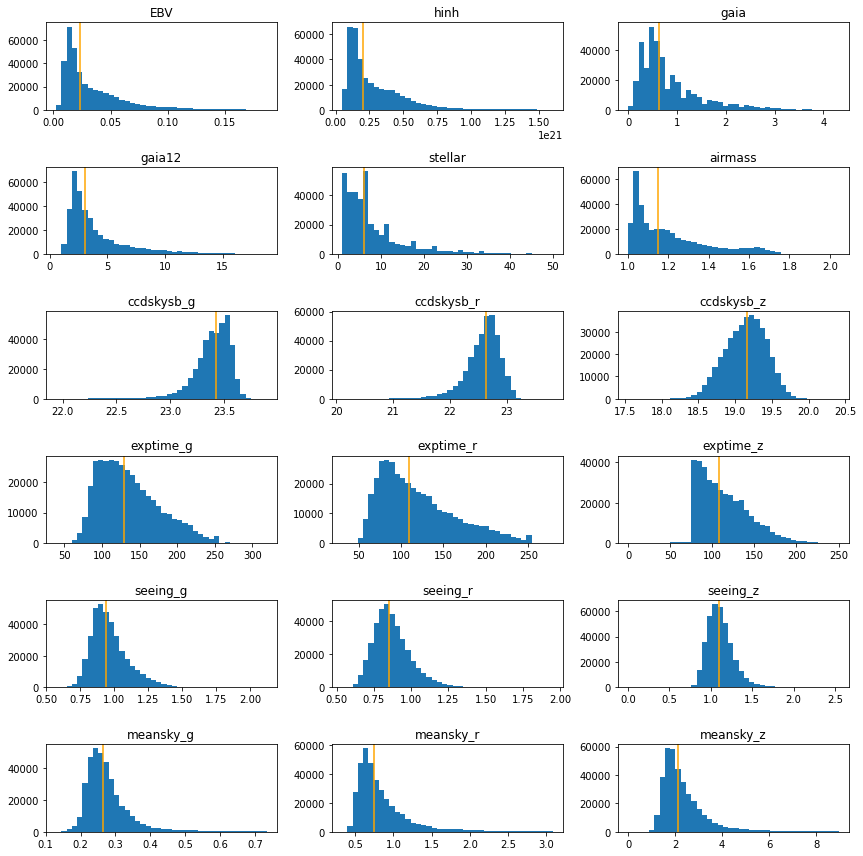

In [27]:
# now plot histograms of the pixel values in each map AFTER the median+-stdev cut.
ipix = data['pixel_id']
fig, axs = plt.subplots(6, 3, figsize=(12, 12))
axs = axs.ravel()
hpmap = np.zeros(hp.nside2npix(512)) + hp.UNSEEN
from scipy.stats import median_absolute_deviation as mad
for i, nm in enumerate(names):
    themin, themax = np.min(data[nm]), np.max(data[nm])
    ind = np.isfinite(data[nm])
    themean, thestd = np.median(data[nm][ind]), mad(data[nm][ind])
    themin2 = themean - x * thestd
    themax2 = themean + x * thestd
    ind &= data[nm] < themax2
    ind &= data[nm] > themin2
    
    print('Systematic', nm, np.sum(~ind))
    hpmap[ipix[~ind]] = 1
    hpmap[ipix[hpmap[ipix] == hp.UNSEEN]] = 0
    
    axs[i].hist(data[nm][ind], log=False, bins=40)
    axs[i].axvline(themean, c='orange')
    axs[i].set_title(nm)
fig.tight_layout()

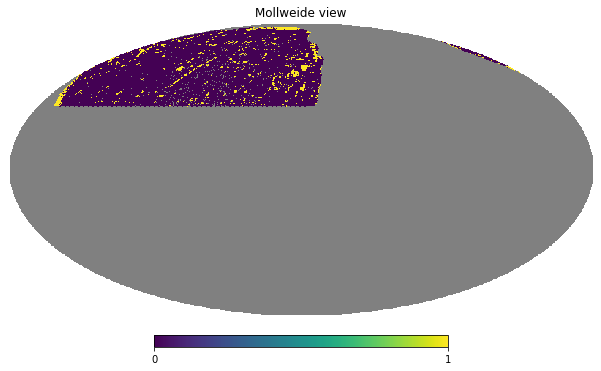

In [12]:
# plot the resulting total mask.
hp.mollview(hpmap, rot=110, cmap='viridis')

/tmp/ipykernel_1450819/1933874103.py:8: DeprecationWarning: `median_absolute_deviation` is deprecated, use `median_abs_deviation` instead!

To preserve the existing default behavior, use
`scipy.stats.median_abs_deviation(..., scale=1/1.4826)`.
The value 1.4826 is not numerically precise for scaling
with a normal distribution. For a numerically precise value, use
`scipy.stats.median_abs_deviation(..., scale='normal')`.

  themean, thestd = np.median(data[nm][ind]), median_absolute_deviation(data[nm][ind])


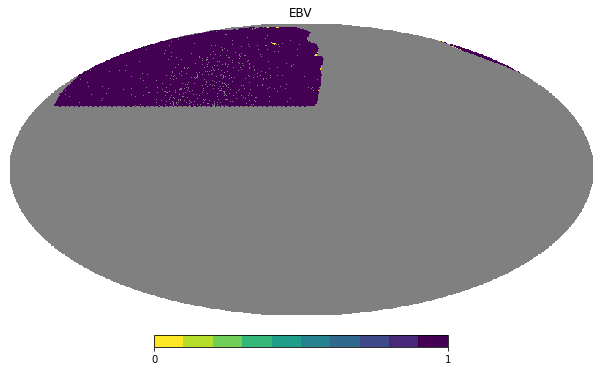

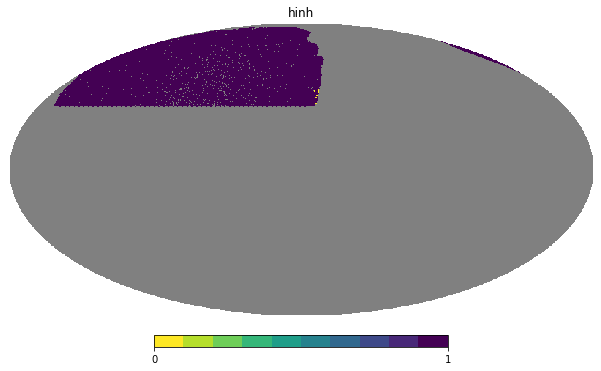

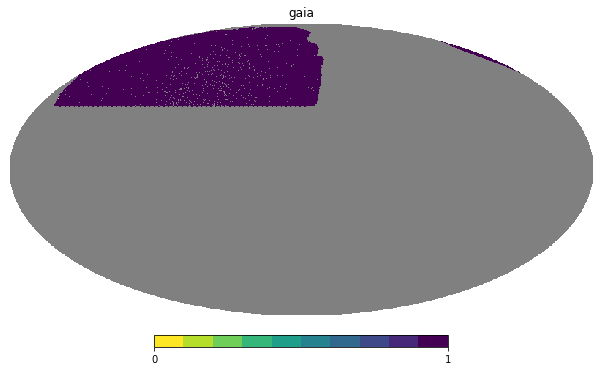

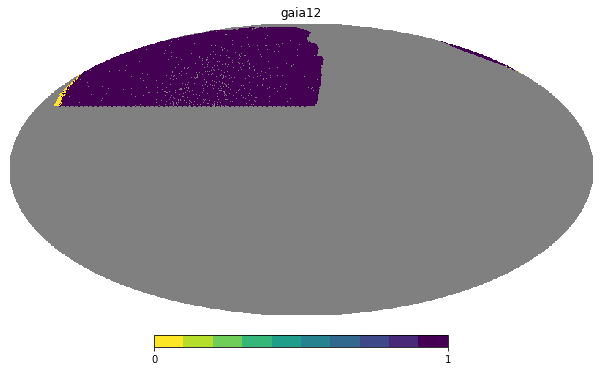

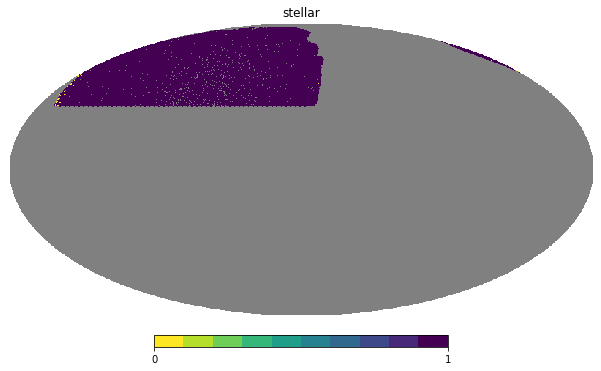

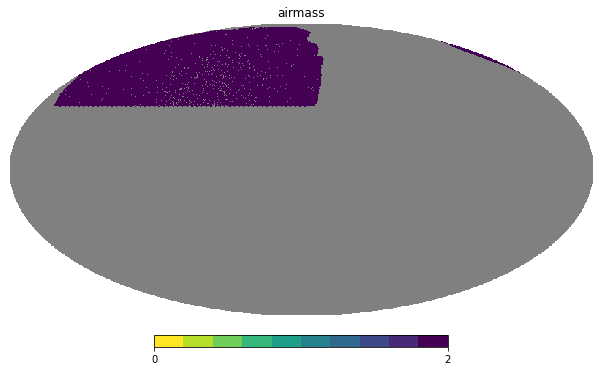

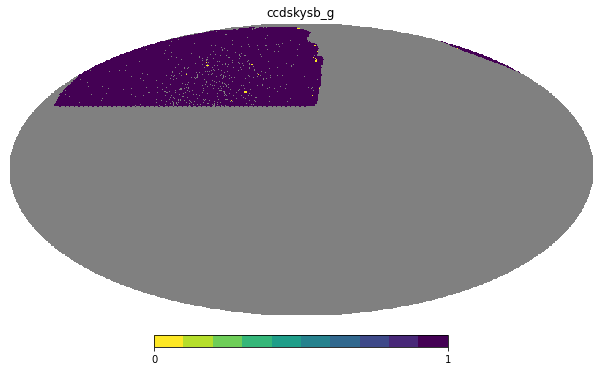

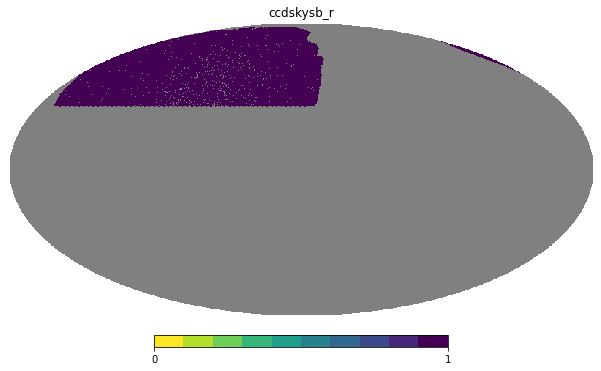

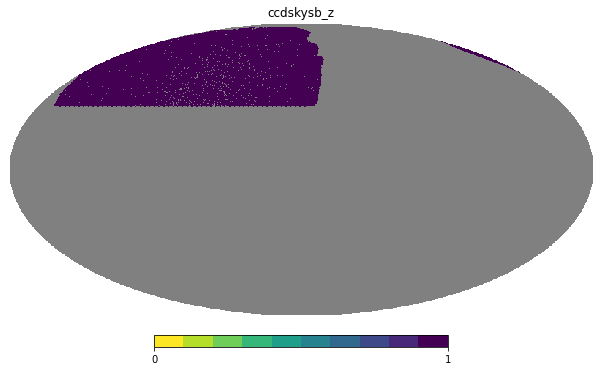

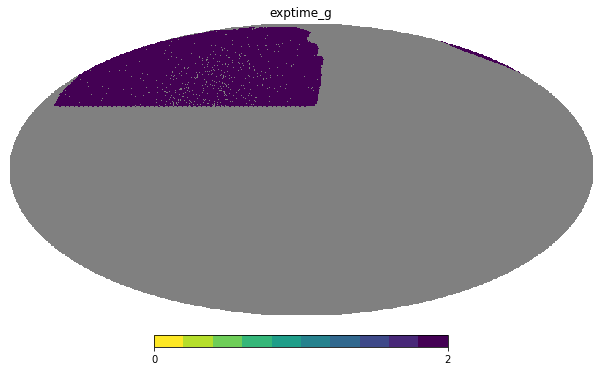

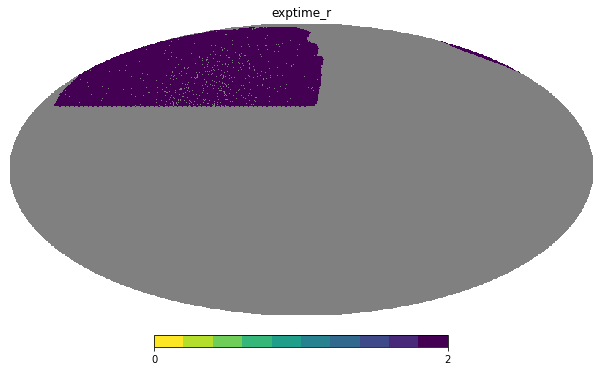

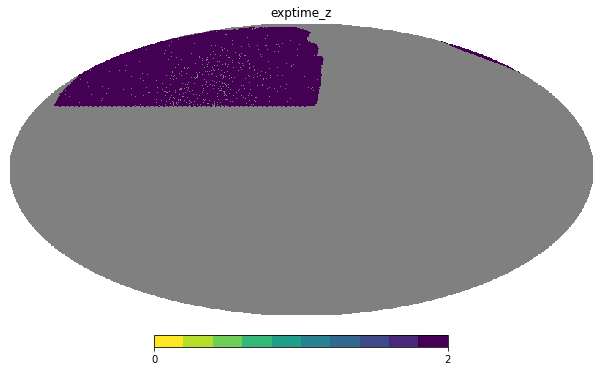

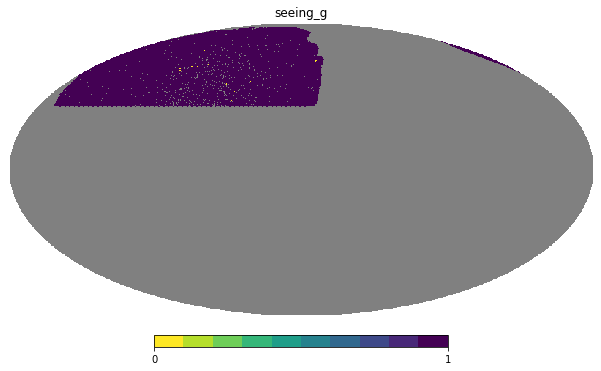

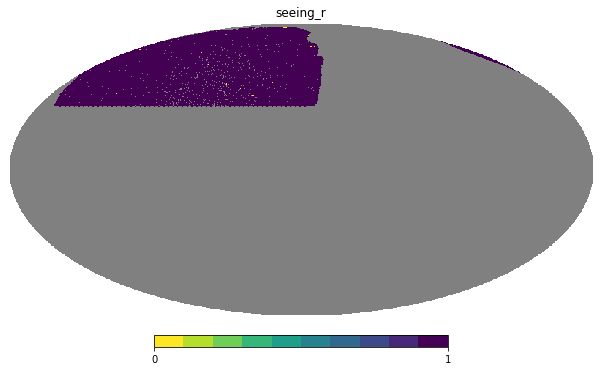

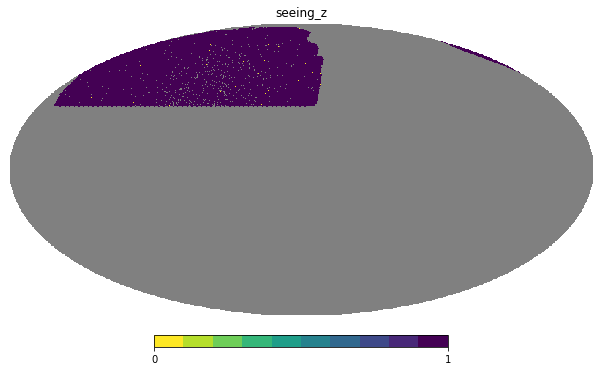

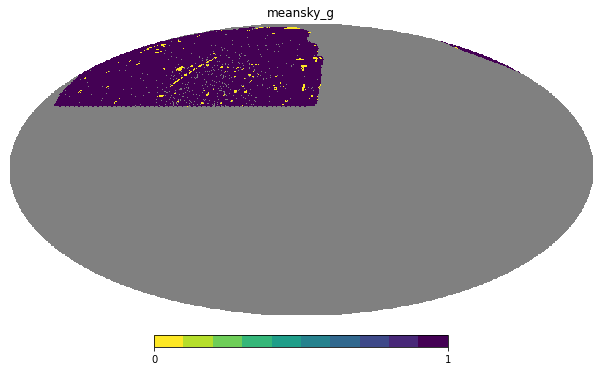

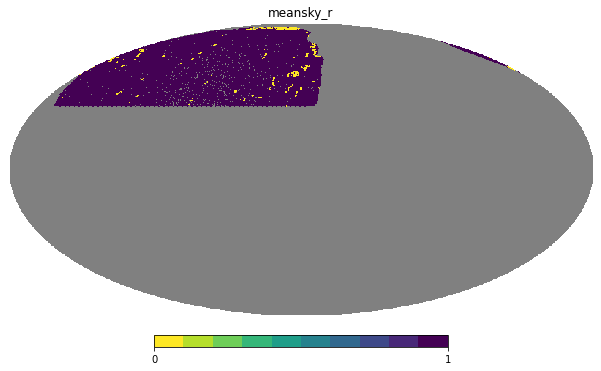

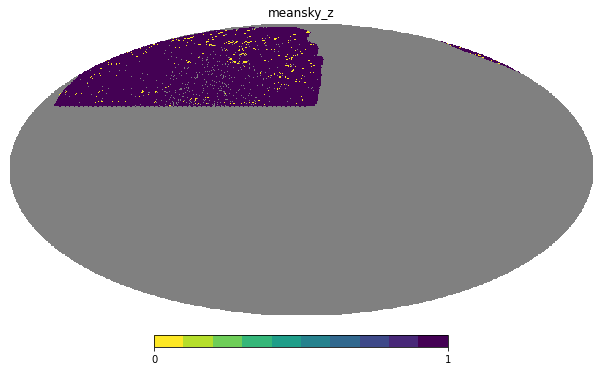

In [13]:
# repeat the loop over systematics but now show what pixels are being cut for each

hpmap = np.zeros(hp.nside2npix(512)) + hp.UNSEEN
from scipy.stats import median_absolute_deviation
for i, nm in enumerate(names):
    themin, themax = np.min(data[nm]), np.max(data[nm])
    ind = np.isfinite(data[nm])
    themean, thestd = np.median(data[nm][ind]), median_absolute_deviation(data[nm][ind])
    themin2 = themean - x * thestd
    themax2 = themean + x * thestd
    ind &= data[nm] < themax2
    ind &= data[nm] > themin2
    if np.sum(ind) > 0:
        hpmap = np.zeros(hp.nside2npix(512)) + hp.UNSEEN
        hpmap[ipix[ind]] = 1
        hpmap[ipix[hpmap[ipix] == hp.UNSEEN]] = 0
        hp.mollview(hpmap, hold=False, cmap=cm.get_cmap('viridis_r', 10), norm='hist', rot=110, title=nm)
